In [18]:
%load_ext autoreload
%autoreload 2
model_filepath='hog_svm_daimler_model.pkl'
print("Loading model from %s..." % model_filepath)
from sklearn.externals import joblib
model = joblib.load(model_filepath) 
print("Model loaded: "+str(model))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading model from hog_svm_daimler_model.pkl...
Model loaded: LinearSVC(C=50, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [20]:
import sys
sys.path.append('../pedestrian')


import daimler
import os
basepath="/media/data/datasets/pedestrian/daimler_mono/DaimlerBenchmark/"
metadata_filepath=os.path.join(basepath,"GroundTruth/GroundTruth2D.db")
test_images_filepath=os.path.join(basepath,"Data/TestData")
metadata,object_names=daimler.read_image_metadata(metadata_filepath)


metadata=metadata[:10]

print("Loaded metadata for %d test images." % len(metadata))

Loaded metadata for 10 test images.


In [28]:
import time
import skimage.io as io
import numpy as np
import experiment
from multiprocessing import Pool
pool = Pool(4) 
    
descriptor_function= lambda image: experiment.my_hog(image)
n=len(metadata)
predictions={}
i=0
print("Evaluating on test set...")

def classify_window(window):
    bbox,descriptor=window
    klass=model.predict(descriptor.reshape(1, -1))
    return (bbox,klass)

for image_metadata in metadata:
    image_filepath=os.path.join(test_images_filepath,image_metadata.filename)
    t = time.time()
    image=io.imread(image_filepath)
#     print("Read image %d ms" %  (time.time() - t))
    hog_windows=experiment.calculate_descriptor_windows(image,descriptor_function,window_scales=[(48,96)],window_strides=(12,6))
#     print("Hog windows %d ms" %  (time.time() - t))
    image_predictions = map(classify_window, hog_windows)
#     print("Predictions %d ms" %  (time.time() - t))
    predictions[image_metadata.filename]=image_predictions
    i+=1
#     if i % (n//20+1) ==0:
#         print("  %f .." % (i/n*100))
    
print("Done.")

Evaluating on test set...
Done.


In [24]:
import pickle

pickle.dump( predictions, open( "predictions.p", "wb" ) )



[]


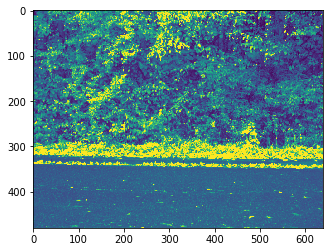

[]


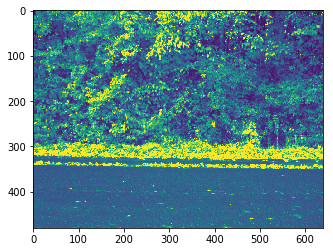

[]


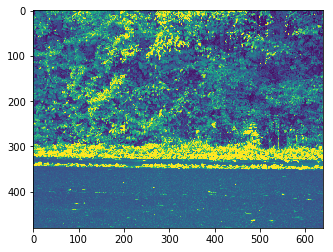

[]


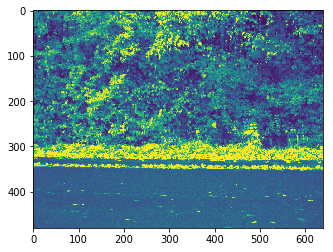

[]


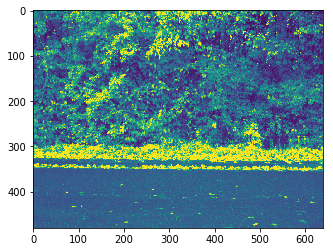

[]


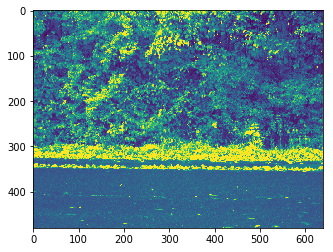

[]


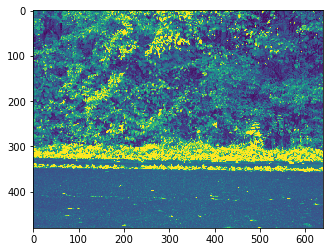

[]


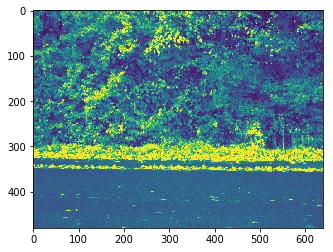

[]


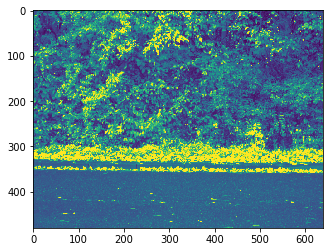

[]


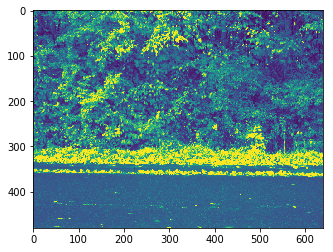

In [27]:

for image_index in range(0,n,1):
    image_metadata=metadata[image_index]
    image_filepath=os.path.join(test_images_filepath,image_metadata.filename)
    image= np.expand_dims(io.imread(image_filepath), axis=2)
    prediction=predictions[image_metadata.filename]
    print([confidence for (bb,confidence) in prediction if confidence >0])

    import matplotlib.pyplot as plt
    plt.imshow(image[:,:,0])
    plt.show()
    plt.figure()


In [6]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    p = Pool(5)
    print(p.map(f, [1, 2, 3]))

[1, 4, 9]


Process ForkPoolWorker-17:
Process ForkPoolWorker-20:
Process ForkPoolWorker-19:
Process ForkPoolWorker-18:
Traceback (most recent call last):
Process ForkPoolWorker-21:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    ta